In [1]:
import numpy as np
from functools import partial

from simulation import Simulation
from objective_functions import LogisticRegression, LinearRegression
from optimization_algorithms import USNA
from datasets import generate_logistic_regression, generate_linear_regression

from config import N, n, true_theta, bias_setting, nu_list, gamma_list, e

In [2]:
objective_function = LogisticRegression(bias=bias_setting)
optimizer_class = USNA
optimizer_list = [
    optimizer_class(nu=nu, generate_Z="canonic deterministic") for nu in nu_list
]

simulation = Simulation(
    objective_function,
    optimizer_list,
    e,
    true_theta=true_theta,
    generate_dataset=partial(generate_logistic_regression, bias=bias_setting),
)

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/10000 [00:00<?, ?it/s]

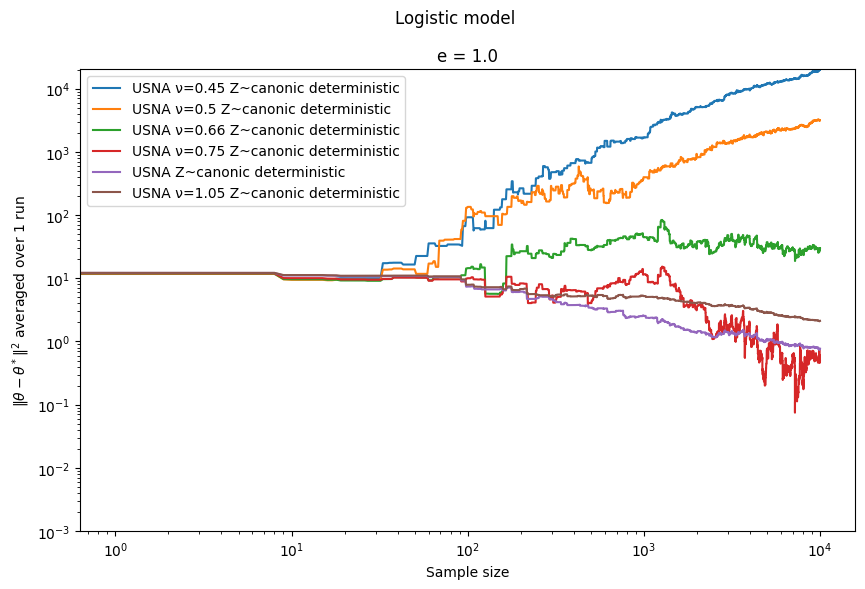

In [3]:
# One run
simulation.dataset = simulation.generate_dataset(n, true_theta)
simulation.generate_initial_theta()
_, _ = simulation.run(plot=True)

Runs:   0%|          | 0/20 [00:00<?, ?it/s]

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/10000 [00:00<?, ?it/s]

/users/nfs/Etu8/17009018/M2A_Projet_Opti_Newton/objective_functions/LogisticRegression.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


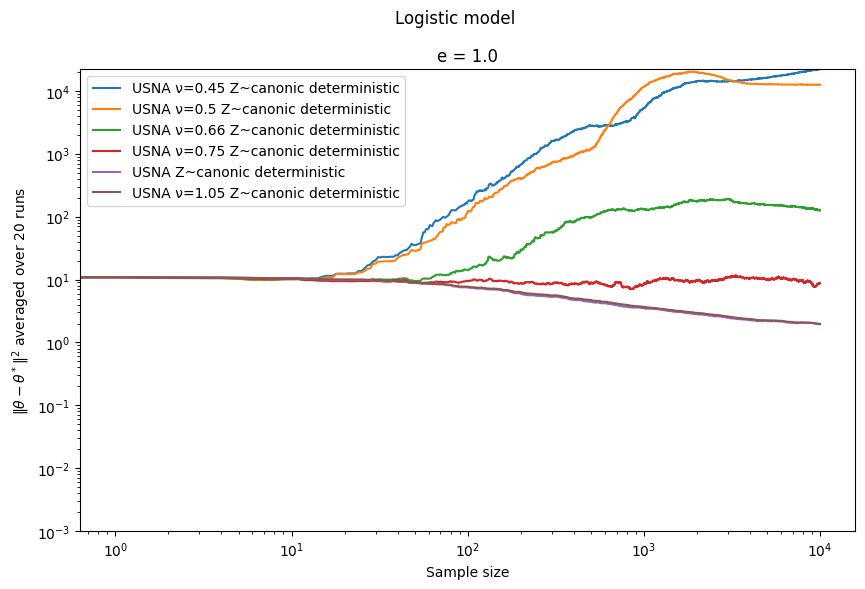

In [4]:
simulation.run_multiple_datasets(N=N, n=n)

In [5]:
objective_function = LinearRegression(bias=bias_setting)
simulation = Simulation(
    objective_function,
    optimizer_list,
    e,
    true_theta=true_theta,
    generate_dataset=partial(generate_linear_regression, bias=bias_setting),
)

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/10000 [00:00<?, ?it/s]

/users/nfs/Etu8/17009018/M2A_Projet_Opti_Newton/optimization_algorithms/USNA.py:110: RuntimeWarning: overflow encountered in matmul
  theta += -learning_rate_theta * self.hessian_inv @ grad
/users/nfs/Etu8/17009018/M2A_Projet_Opti_Newton/optimization_algorithms/USNA.py:110: RuntimeWarning: invalid value encountered in matmul
  theta += -learning_rate_theta * self.hessian_inv @ grad
/users/Etu8/17009018/venv/myenv/lib/python3.11/site-packages/matplotlib/scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)
/users/nfs/Etu8/17009018/M2A_Projet_Opti_Newton/simulation/simulation.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(top=min(max_error, 1e5))


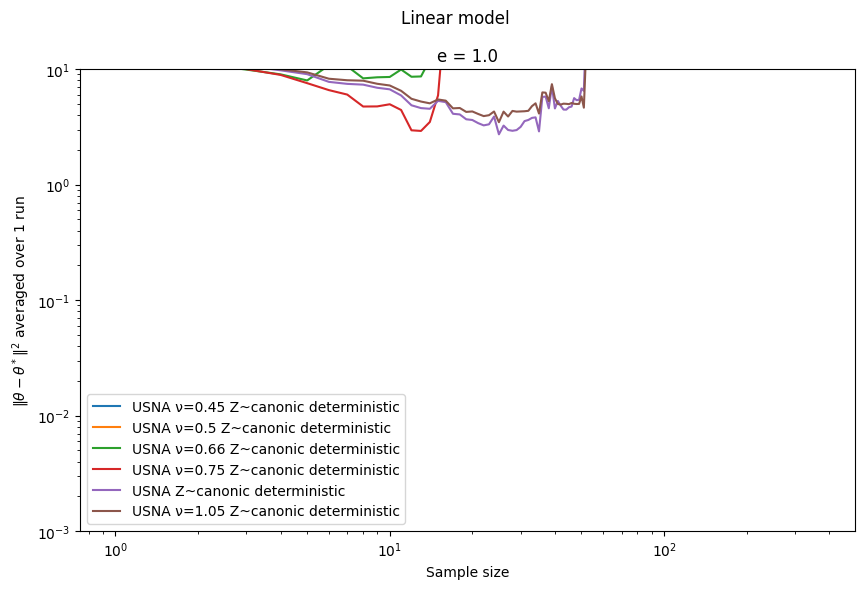

In [6]:
# One run
simulation.dataset = simulation.generate_dataset(n, true_theta)
simulation.generate_initial_theta()
_, _ = simulation.run(plot=True)

Runs:   0%|          | 0/20 [00:00<?, ?it/s]

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/10000 [00:00<?, ?it/s]

/users/nfs/Etu8/17009018/M2A_Projet_Opti_Newton/objective_functions/LinearRegression.py:57: RuntimeWarning: overflow encountered in multiply
  grad = error * phi


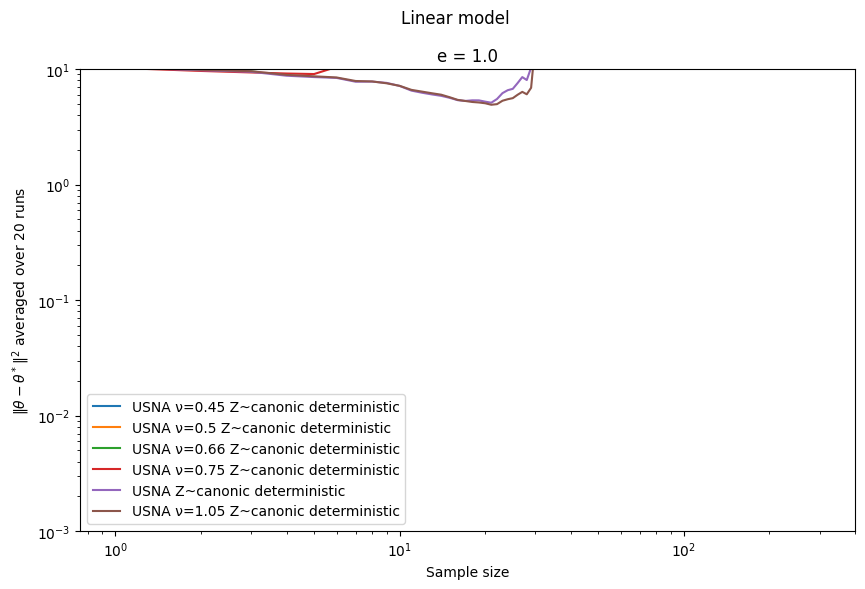

In [7]:
simulation.run_multiple_datasets(N=N, n=n)